In [77]:
!pip install yfinance
import yfinance as yf

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Question 1

## Download Monthly Stock Price Data

In [79]:
# Import the stock price for YUM!Brands
stock_price = yf.download("YUM", start="2015-01-01",end="2019-12-31",interval="1mo")

[*********************100%%**********************]  1 of 1 completed


In [80]:
# view data
stock_price.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,52.796551,53.874908,49.877785,51.962616,44.057091,89075190
2015-02-01,52.077641,59.288280,50.682961,58.310570,49.720020,98622736
2015-03-01,58.231487,59.547089,54.924515,56.592381,48.254959,108828503
2015-04-01,56.542057,62.846874,56.017254,61.797268,52.693050,117744256
2015-05-01,62.185478,68.943207,62.156723,64.780731,55.527767,131486361


In [81]:
stock_price.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-01,116.150002,119.720001,113.639999,116.779999,108.174095,33172100
2019-09-01,116.800003,119.589996,110.180000,113.430000,105.451477,36478400
2019-10-01,113.400002,115.169998,97.739998,101.709999,94.555840,42693600
2019-11-01,101.930000,102.230003,96.940002,100.669998,93.588989,50159100
2019-12-01,100.709999,102.199997,98.029999,100.730003,94.047508,34331700


## Calculate Monthly Log Returns and Annualized Return

In [83]:
# calculate the monthly log returns
stock_price['Monthly_Return'] = stock_price['Adj Close'].pct_change()

In [86]:
# calculate the annulized return
annualized_return = stock_price['Monthly_Return'].mean() * 12
print(f'Annualized Return: {annualized_return * 100:.2f}%')

Annualized Return: 17.04%


## Calculate Annualized Volatility

In [87]:
annualized_volatility = stock_price['Monthly_Return'].std() * np.sqrt(12)
print(f'Annualized Volatility: {annualized_volatility * 100:.2f}%')

Annualized Volatility: 17.71%


## Download ESG Data and Handle Missing Values

In [17]:
!pip install yesg
import yesg

In [88]:
# Import ESG Scores 
ESG = yesg.get_historic_esg('YUM')
ESG

,Total-Score,E-Score,S-Score,G-Score
Date,,,,
2014-09-01,58.00,52.00,61.00,64.00
2014-10-01,58.00,52.00,61.00,64.00
2014-11-01,58.00,52.00,61.00,64.00
2014-12-01,58.00,51.00,63.00,64.00
2015-01-01,58.00,51.00,63.00,64.00
...,...,...,...,...
2022-04-01,NaN,NaN,NaN,NaN
2022-05-01,21.12,4.40,11.65,5.07
2022-06-01,NaN,NaN,NaN,NaN


In [90]:
# Extract ESG scores from 2015-01-01 to 2019-12-31
start_date="2015-01-01"
end_date="2019-12-31"
filtered_esg_scores = ESG.loc[start_date:end_date]
filtered_esg_scores

,Total-Score,E-Score,S-Score,G-Score
Date,,,,
2015-01-01,58.00,51.00,63.00,64.00
2015-02-01,58.00,51.00,63.00,64.00
2015-03-01,59.00,52.00,63.00,64.00
2015-04-01,59.00,52.00,63.00,64.00
2015-05-01,59.00,52.00,63.00,64.00
2015-06-01,57.00,52.00,58.00,64.00
2015-07-01,57.00,52.00,58.00,64.00
2015-08-01,57.00,52.00,58.00,64.00
2015-09-01,57.00,52.00,58.00,64.00


In [91]:
# Extract the total score
Total_Score = filtered_esg_scores['Total-Score']
Total_Score

Date
2015-01-01    58.00
2015-02-01    58.00
2015-03-01    59.00
2015-04-01    59.00
2015-05-01    59.00
2015-06-01    57.00
2015-07-01    57.00
2015-08-01    57.00
2015-09-01    57.00
2015-10-01    57.00
2015-11-01    57.00
2015-12-01    57.00
2016-01-01    57.42
2016-02-01    57.72
2016-03-01    57.72
2016-04-01    55.42
2016-05-01    55.42
2016-06-01    55.68
2016-07-01    55.68
2016-08-01    53.97
2016-09-01    53.97
2016-10-01    53.97
2016-11-01    53.97
2016-12-01    53.97
2017-01-01    53.97
2017-02-01    53.97
2017-03-01    53.97
2017-04-01    53.97
2017-05-01    53.47
2017-06-01    53.47
2017-07-01    53.47
2017-08-01    53.97
2017-09-01    53.97
2017-10-01    53.58
2017-11-01    52.77
2017-12-01    52.77
2018-01-01    52.77
2018-02-01    52.77
2018-03-01    53.69
2018-04-01    53.32
2018-05-01    53.32
2018-06-01    53.32
2018-07-01    53.32
2018-08-01    53.32
2018-09-01    53.32
2018-10-01    53.32
2018-11-01    57.70
2018-12-01    57.96
2019-01-01    57.96
2019-02-01    5

Text(0.5, 1.0, 'ESG Total Score for Yum!Brands')

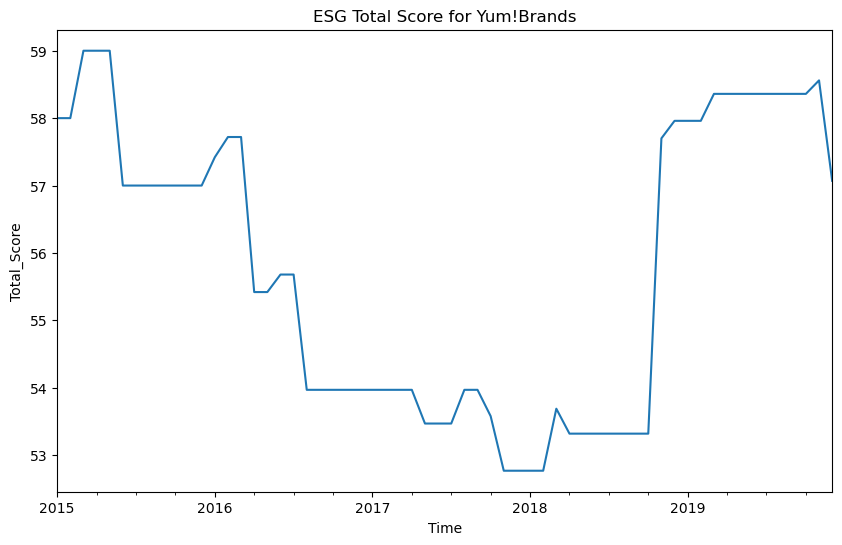

In [92]:
# There is no missing values, so we can plot and analyse
Total_Score.plot(figsize=(10, 6))
plt.xlabel('Time')
plt.ylabel('Total_Score')
plt.title('ESG Total Score for Yum!Brands')

In [93]:
# Find the correlation coefficient between stock price and esg score
correlation = stock_price['Adj Close'].corr(Total_Score)
print(f"The correlation between the stock price and esg total score of Yum!Brands from 2015-01-01 to 2019-12-31 is {correlation:.4f}")

The correlation between the stock price and esg total score of Yum!Brands from 2015-01-01 to 2019-12-31 is 0.1420


# Question 2

### I was born in Shanghai, China and the month of my birth is June


In [94]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

In [95]:
# setting the time period
start = datetime(2022, 6, 1)
end = datetime(2022, 6, 30)

In [96]:
# Specifying the location of Shanghai
# The latitude, longitude and altitude for Shanghai is 29.868336, 121.543991, 149
location = Point(31.2222, 121.4581, 12)

In [97]:
# extract the daily data
data = Daily(location, start, end)
data = data.fetch()

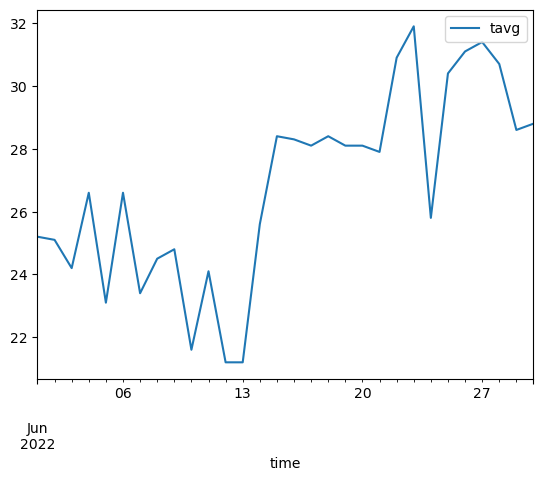

In [98]:
# plot the temperature data
data.plot(y=['tavg'])
plt.show()

In [99]:
# calculating CDD
T_base = 18
cdds = [max(temp - T_base, 0) for temp in data.tavg]
cdds

[7.199999999999999,
 7.100000000000001,
 6.199999999999999,
 8.600000000000001,
 5.100000000000001,
 8.600000000000001,
 5.399999999999999,
 6.5,
 6.800000000000001,
 3.6000000000000014,
 6.100000000000001,
 3.1999999999999993,
 3.1999999999999993,
 7.600000000000001,
 10.399999999999999,
 10.3,
 10.100000000000001,
 10.399999999999999,
 10.100000000000001,
 10.100000000000001,
 9.899999999999999,
 12.899999999999999,
 13.899999999999999,
 7.800000000000001,
 12.399999999999999,
 13.100000000000001,
 13.399999999999999,
 12.7,
 10.600000000000001,
 10.8]

In [101]:
# calculate the total cdd
Total_cdds = sum(cdds)
Total_cdds

264.1